

> **Imports & Setups**



In [1]:
import kagglehub
import os
import pandas as pd
import numpy as np

#visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid") # set a clean style for all plots

#Label Encoding
from sklearn.preprocessing import LabelEncoder

#Import StandardScaler to scale numerical features
from sklearn.preprocessing import StandardScaler

# Import function to split the dataset
from sklearn.model_selection import train_test_split

# Import Logistic Regression Model
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
# RFE --> Feature selection technique
# LogisticRegression --> Model used to evaluate feature importance

# Import the the Accuracy Metric
from sklearn.metrics import accuracy_score

# Import the Confusion Matrix
from sklearn.metrics import confusion_matrix

# Import the Classification Report
from sklearn.metrics import classification_report

# Import Accracy Measures
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Import KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# Import Cross Validation
from sklearn.model_selection import cross_val_score

# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Import Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# IMport XBG Classifier
from xgboost import XGBClassifier

In [2]:
# Importing Kaggle database
path = kagglehub.dataset_download("ninzaami/loan-predication")
print("Path to dataset files:", path)

100%|██████████| 7.83k/7.83k [00:00<00:00, 2.45MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/ninzaami/loan-predication/versions/1


In [3]:
# To know the file name
os.listdir(path)

['train_u6lujuX_CVtuZ9i (1).csv']

# **`1. Data Info`**

In [4]:
# Read Data
df = pd.read_csv(path + '/train_u6lujuX_CVtuZ9i (1).csv')
df.head() # First 5 Rows

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.tail() # Last 5 Rows
# Here we are loading sample of data to know the features and the if data categorical or numerical
# The same thinf we did in --> df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [6]:
# Data Shape --> (Row,Column)
df.shape

(614, 13)

In [7]:
# Columns --> Data Features
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
df.dtypes


,0
Loan_ID,object
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64


In [9]:
# We determine the target which will be predicted by the ML
# X is the input to ML and (drop(target, axis = 1)) mean that the ML will see all the table except the dropped column => (Target)
# Y is the final output the ML will predict => (Target)

target = "Loan_Status"
# The 'x' and 'y' variables will be defined after cleaning and encoding 'df'

# **`2. Data Cleaning`**

In [10]:
print("Data Information:")
print("=================")
df.info()

print("\n")
print("=========================")

print("If Data has NULLs:")
print("==================")
df.isnull().sum()

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


If Data has NULLs:


,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [11]:
# Handling Missing values --> For Categorical Columns
df[['Gender', 'Married' , 'Dependents' , 'Self_Employed' , 'Credit_History']].mode()

,Gender,Married,Dependents,Self_Employed,Credit_History
0,Male,Yes,0,No,1.0


In [12]:
# Handling Missing values --> For Numerical Columns
# Median is better than Mean --> Mean can be effected by large numbers
df[['LoanAmount' , 'Loan_Amount_Term']].median()

,0
LoanAmount,128.0
Loan_Amount_Term,360.0


In [13]:
# Dropping Column because:
# 1. Unique ID
# 2. No Pattern
# 3. Add Noise to data
df = df.drop(columns=['Loan_ID'])
df.shape

(614, 12)

In [14]:
# Categorical columns - fill with mode
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

# Numerical columns - fill with median
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(), inplace=True)


/tmp/ipython-input-1950214208.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
/tmp/ipython-input-1950214208.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

In [15]:
df.isnull().sum()
# Now Data is cleaned with no missing values

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


# **`3. Exploratory Data Analysis (EDA)`**

In [16]:
print(f"Target: {target}")

Target: Loan_Status


In [17]:
# Knowing the count of values (Accepted vs Rejected) --> Target Distribution
# Also from this line we know if data balanced or not
df['Loan_Status'].value_counts()

# --> Data is not balanced

,count
Loan_Status,
Y,422
N,192


In [18]:
# The same thing we did last block but with proportion --> Percentages
df[target].value_counts(normalize=True)

,proportion
Loan_Status,
Y,0.687296
N,0.312704


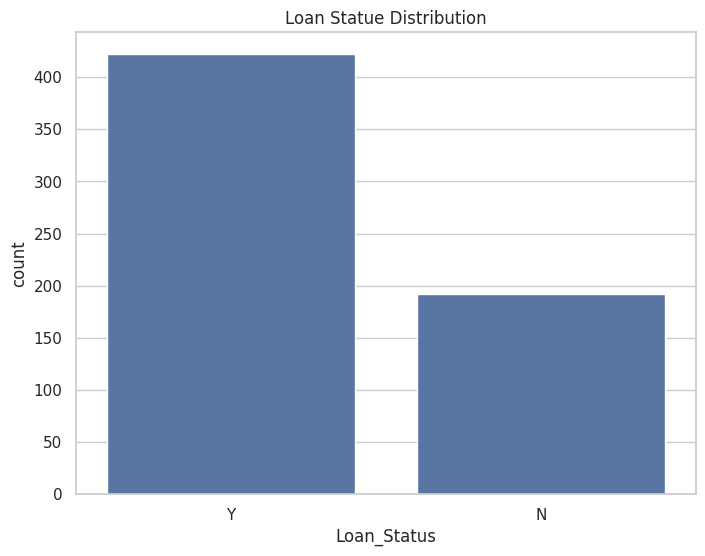

In [19]:
# Histogram for Target count
plt.figure(figsize=(8,6))
sns.countplot(x='Loan_Status', data=df)
plt. title("Loan Statue Distribution")
plt.show()

**EDA For Numerical Columns**

In [20]:
df.describe(include='all')

# --> Describtion for all data (CAT/NUM)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,614,614,614,614,614.000000,614.000000,614.000000,614.000000,614.000000,614,614
unique,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,502,401,360,480,532,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,145.752443,342.410423,0.855049,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,84.107233,64.428629,0.352339,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.250000,360.000000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.000000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,164.750000,360.000000,1.000000,NaN,NaN


**NOTE:** *df.describe(), without any "include" describe the numerical data only*

In [21]:
#To see the Numerical decribtion of numerical column with the seen features below
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


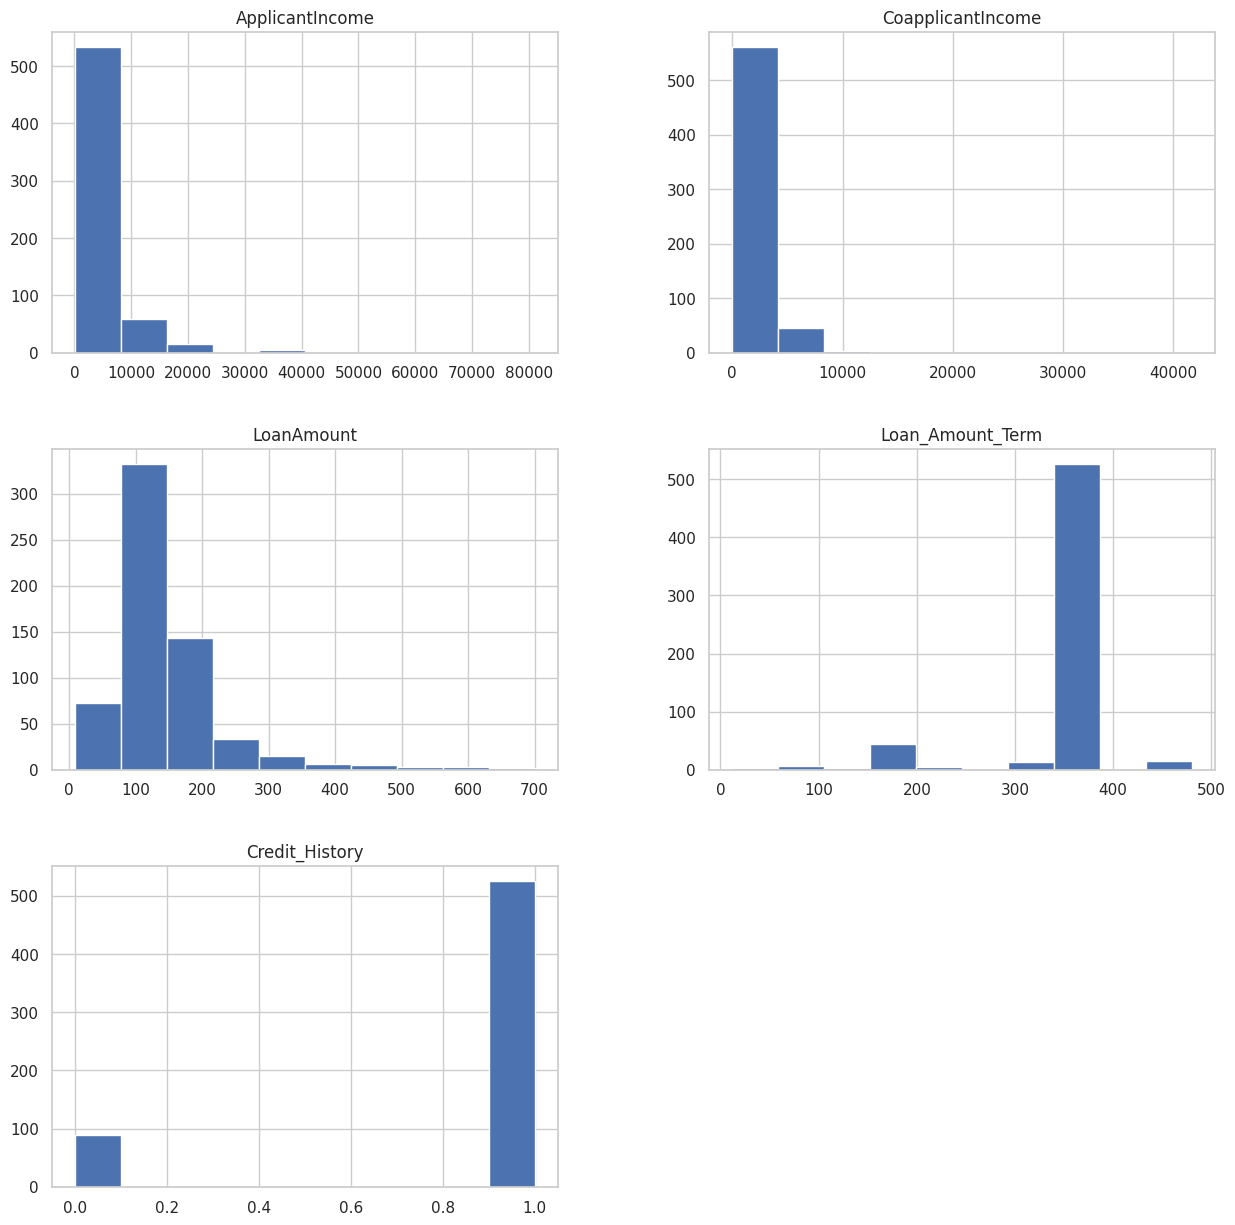

In [22]:
# Histogram of data columns to see the where data is high and low --> Outlier Detection
df.hist(figsize=(15,15))
plt.show()

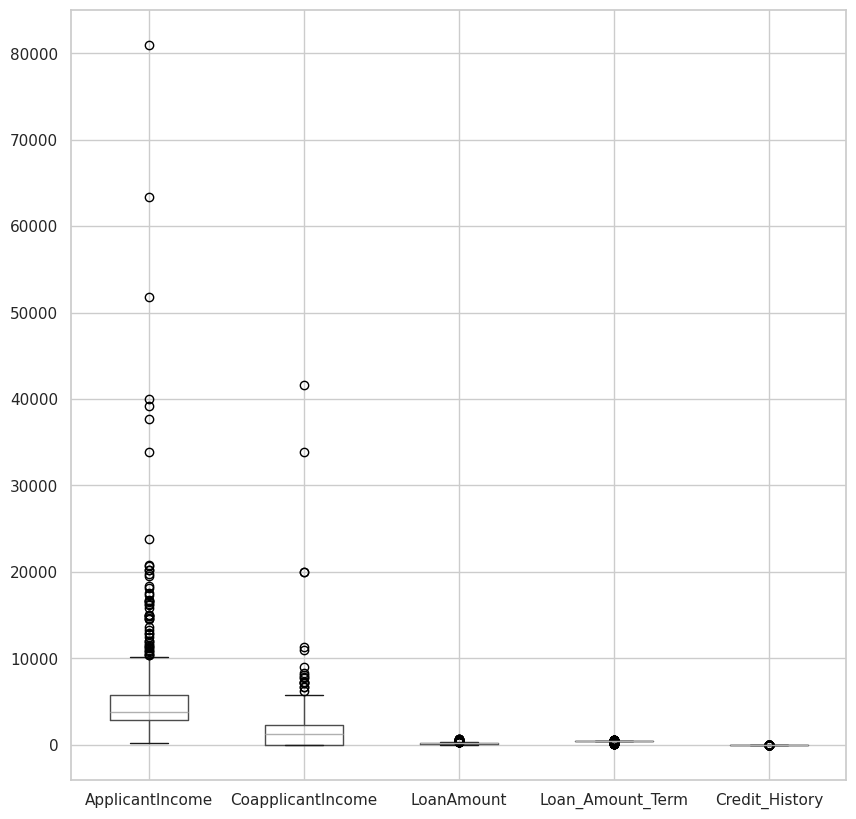

In [23]:
# To visualize the Outliers
df.boxplot(figsize=(10,10))
plt.show()

**EDA For Categorical Columns**

In [24]:
# Selecting the categrical columns from the data table --> Datatype = 'object'
cat_col = df.select_dtypes(include='object').columns
cat_col

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

In [25]:
df.describe(include='object')

# --> Describtion for Categorical data only

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,614,614,614,614,614,614
unique,2,2,4,2,2,3,2
top,Male,Yes,0,Graduate,No,Semiurban,Y
freq,502,401,360,480,532,233,422


In [26]:
# Distribution Values of Categorical Columns
for col in cat_col:
  print(f"\n***Column {col}:***")
  print(df[col].value_counts())


***Column Gender:***
Gender
Male      502
Female    112
Name: count, dtype: int64

***Column Married:***
Married
Yes    401
No     213
Name: count, dtype: int64

***Column Dependents:***
Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64

***Column Education:***
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

***Column Self_Employed:***
Self_Employed
No     532
Yes     82
Name: count, dtype: int64

***Column Property_Area:***
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

***Column Loan_Status:***
Loan_Status
Y    422
N    192
Name: count, dtype: int64


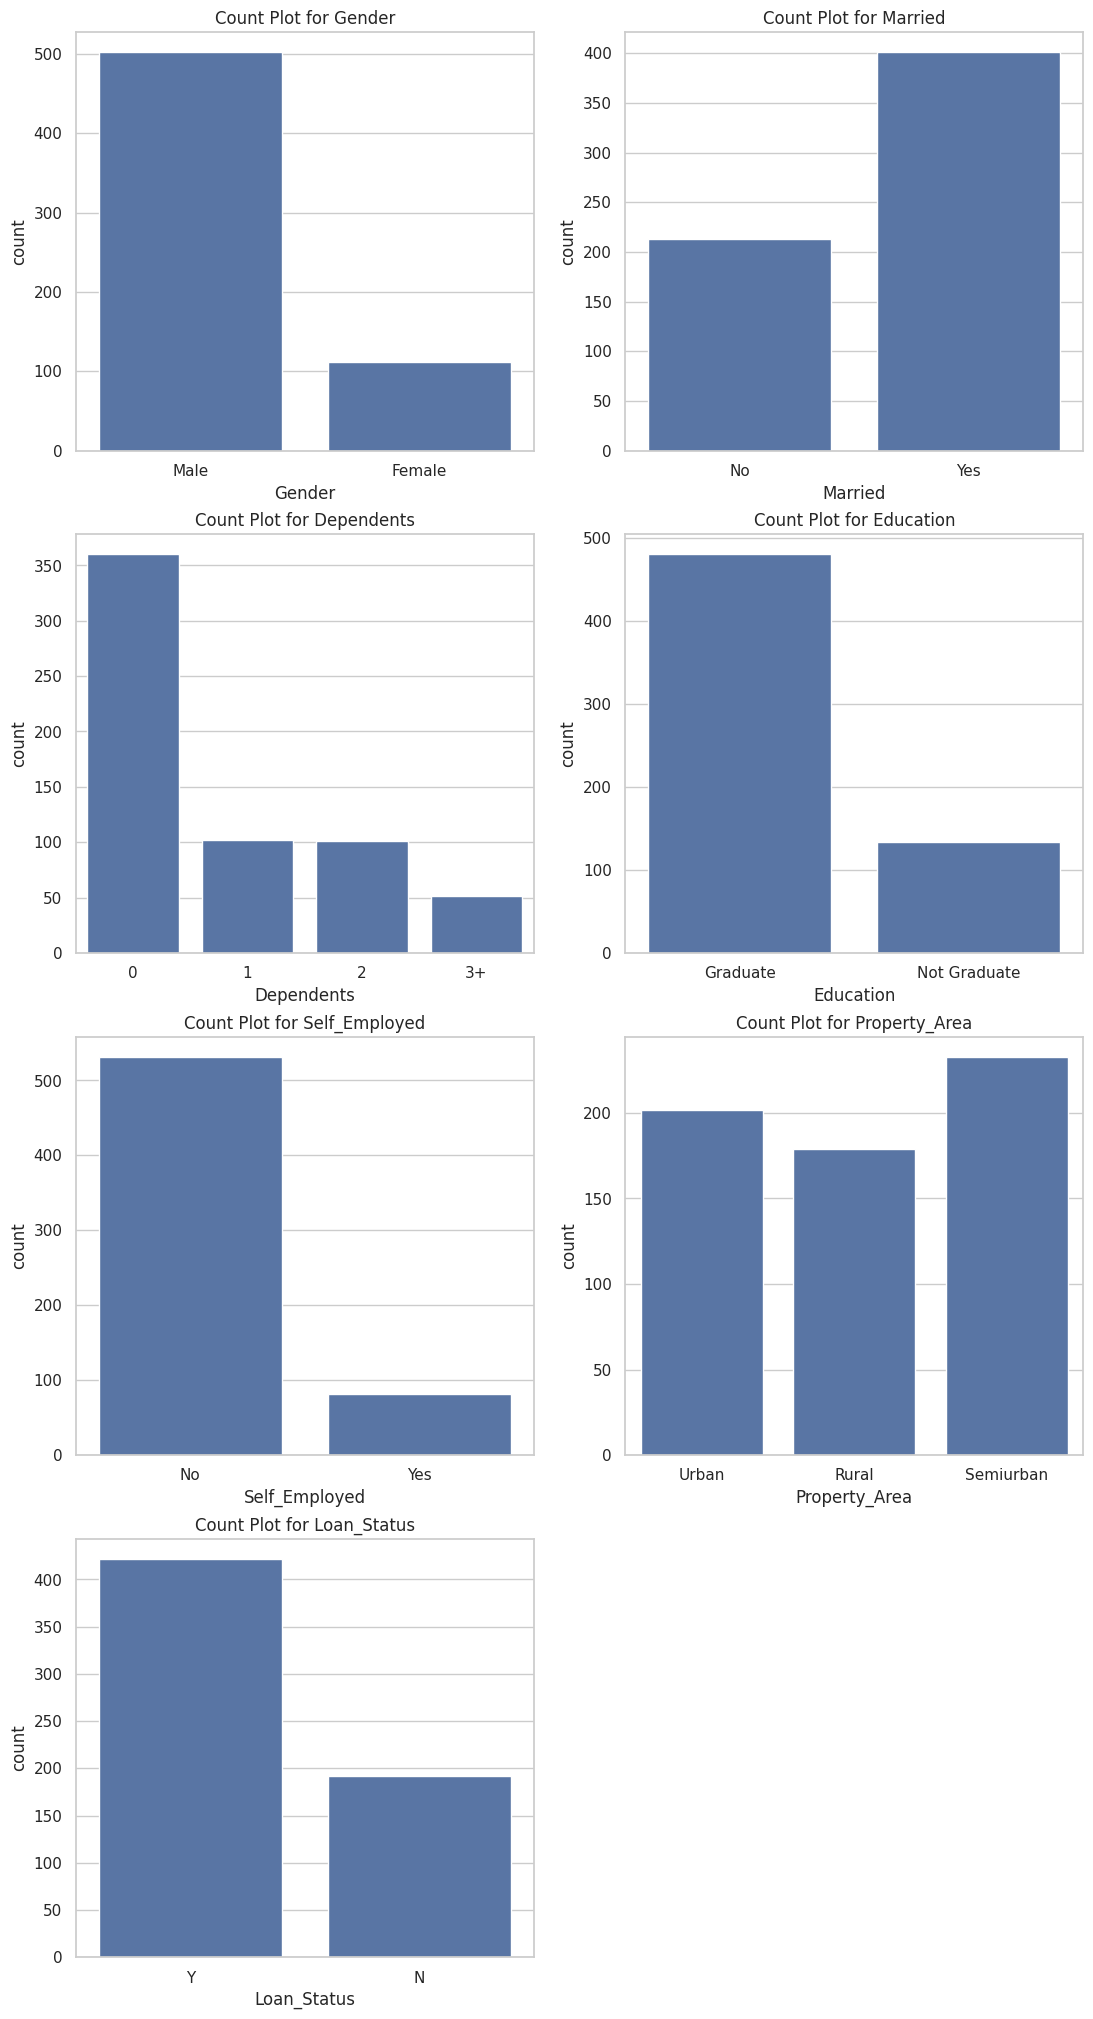

In [27]:
# Visualize the Categorical Columns --> Outlier Detection
plt.figure(figsize=(13,25))
for i, col in enumerate(cat_col,1):
  plt.subplot(4,2,i)
  sns.countplot(x=col, data=df)
  plt.title(f"Count Plot for {col}")
plt.tight_layout
plt.show()

In [28]:
# Categorical vs Target
# Is the column effets the Target ?

for col in cat_col:
  print(f"\n***{col} vs {target}***")
  print(pd.crosstab(df[col], df[target], normalize='index'))

# The output is percentage of the acceptance or the rejection of the feature based on the target


***Gender vs Loan_Status***
Loan_Status         N         Y
Gender                         
Female       0.330357  0.669643
Male         0.308765  0.691235

***Married vs Loan_Status***
Loan_Status         N         Y
Married                        
No           0.370892  0.629108
Yes          0.281796  0.718204

***Dependents vs Loan_Status***
Loan_Status         N         Y
Dependents                     
0            0.313889  0.686111
1            0.352941  0.647059
2            0.247525  0.752475
3+           0.352941  0.647059

***Education vs Loan_Status***
Loan_Status          N         Y
Education                       
Graduate      0.291667  0.708333
Not Graduate  0.388060  0.611940

***Self_Employed vs Loan_Status***
Loan_Status           N         Y
Self_Employed                    
No             0.312030  0.687970
Yes            0.317073  0.682927

***Property_Area vs Loan_Status***
Loan_Status           N         Y
Property_Area                    
Rural          0.385

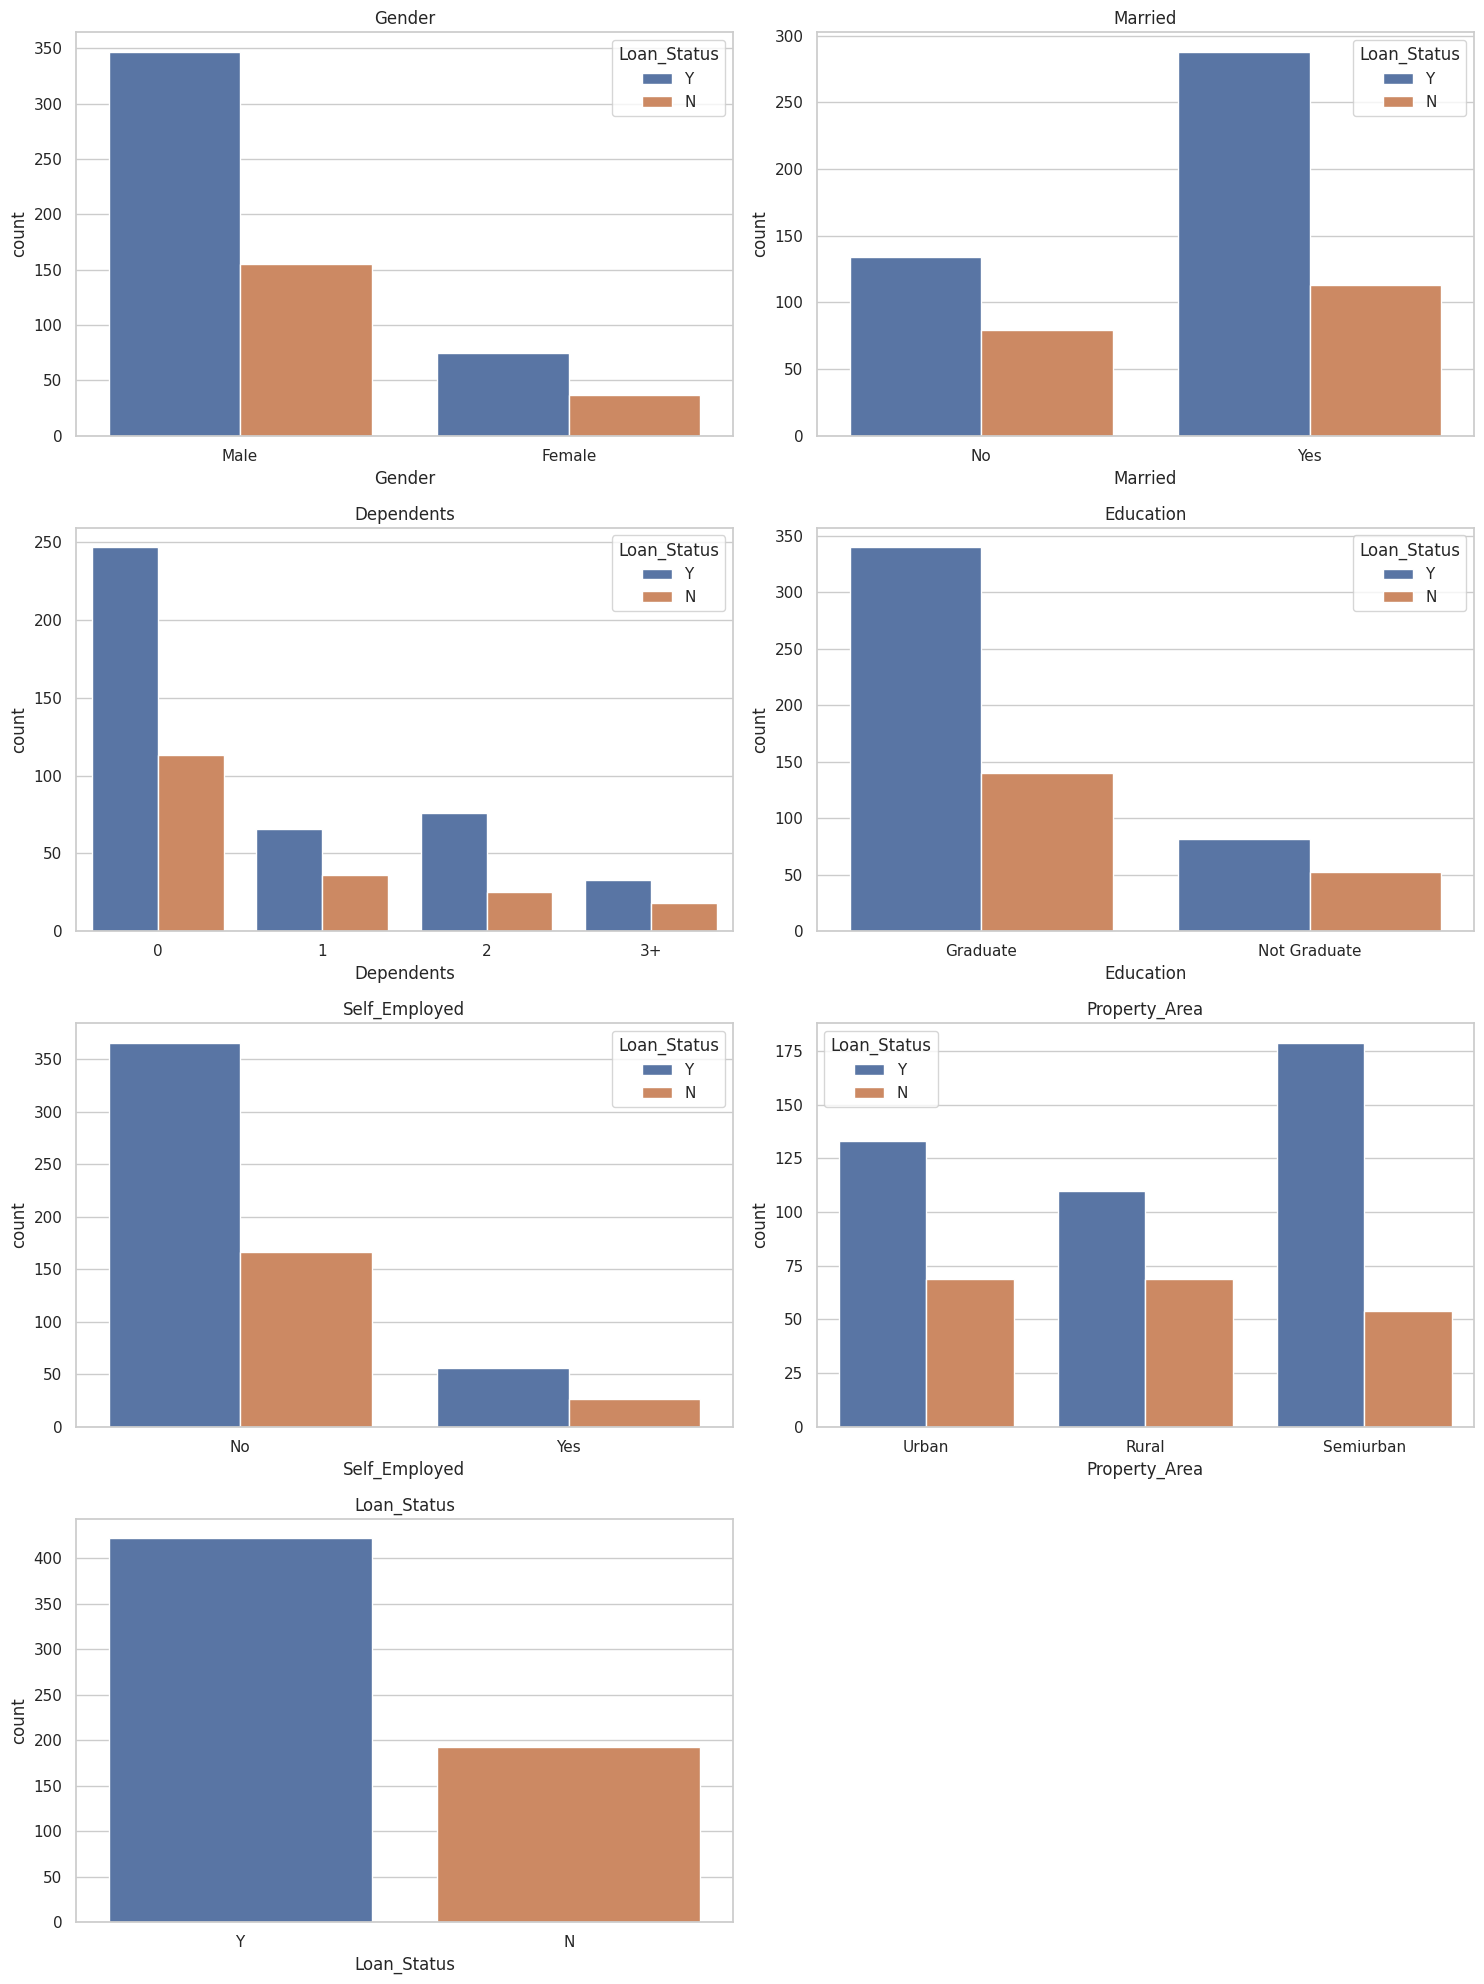

In [29]:
# Visualize the Categorical Columns vs Target
plt.figure(figsize=(15,20))

for i, col in enumerate(cat_col, 1):
    plt.subplot(4, 2, i)
    sns.countplot(x=col, hue=target, data=df)
    plt.title(col)

plt.tight_layout()
plt.show()

# **`4. Feature Engineering`**

**This atep is happening to encode the data to help the ML to understand it and take the right decision**

# **A. Encoding**

*We make this step to convets the data values into binary 0s and 1s.*

*And we do that to help the ML work with data beacuse NO ML can work with object or string data like people.*

In [30]:
cat_col

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

In [31]:
# A. Encoding: Convert Text to Numerical.
# B. Target Encoding: For labeling the TARGET data only -->"Loan_Statue"
# C. One-Hot Encoding: Convert the CATEGORICAL FEATURES into Binary values

# << Label Encoding >> #
labelEncode = LabelEncoder() # From sklearn
df[target] = labelEncode.fit_transform(df[target])

# --> This code converts categorical target labels into binary numerical values
# --> Yes = 1 , No = 0

# Why Label Encoding ?
# 1. Binary Values
# 2. ordering is not important
# <<And used when feature has only 2 categories (Y or N) nor more

print(df[target])
# Now Target data is binary labelencoded

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64


In [32]:
# << Label Encoding >> #
# The target column 'Loan_Status' in 'df' was label encoded in the previous step.

# Now that 'df' has been cleaned (missing values handled, Loan_ID dropped) and the target encoded,
# we can safely separate features (x) and target (y).
y = df[target]
x = df.drop(target, axis=1)

# << One-Hot Encoding >> #
x = pd.get_dummies(x, drop_first=True)
print(x)

#get_dummies --> Converts categorical features into multiple binary indicator columns

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0       128.0             360.0   
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
..               ...                ...         ...               ...   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History  Gender_Male  Married_Yes  Dependents_1  Dependents_2  \
0               1.0         True        False 

# **B. Feature Scaling**

**Features are not with the same scale range. So we do this to fix this problem.**


In [33]:
# Create an object from StandardScaler
scaler = StandardScaler()

# Fit the scaler on FEATURES and transform them
# --> This step makes all features on the same scale (mean = 0 , std = 1)
x_scaled = scaler.fit_transform(x)

# Convert the scaled data back to DataFrame
# --> To keep column names and make data easier to read
x = pd.DataFrame(x_scaled , columns = x.columns)

print(x)

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0           0.072991          -0.554487   -0.211241          0.273231   
1          -0.134412          -0.038732   -0.211241          0.273231   
2          -0.393747          -0.554487   -0.948996          0.273231   
3          -0.462062           0.251980   -0.306435          0.273231   
4           0.097728          -0.554487   -0.056551          0.273231   
..               ...                ...         ...               ...   
609        -0.410130          -0.554487   -0.889500          0.273231   
610        -0.212557          -0.554487   -1.258378         -2.522836   
611         0.437174          -0.472404    1.276168          0.273231   
612         0.357064          -0.554487    0.490816          0.273231   
613        -0.134412          -0.554487   -0.151745          0.273231   

     Credit_History  Gender_Male  Married_Yes  Dependents_1  Dependents_2  \
0          0.411733     0.472343    -1.372089 

# ***C. Train / Test Split***

**This step is to train the model and test it on new data**

In [34]:
# Split the data into Training and Testing sets
# --> 80% for training
# --> 20% for testing
# --> random_state is used to get the same result every time

X_train, X_test, y_train, y_test = train_test_split(
    x,                 # Features after all processing (scaling, feature engineering, outlier handling)
    y,                 # Target variable
    test_size=0.2,     # Size of test data 20%
    random_state=42    # Fixed random seed
)

# ***D. Feature Creation***

**Creating new features from existing features which helps the mode to work well**

In [35]:
# Create TotalIncome feature
# --> sum of ApplicantIncome and CoapplicantIncome
x['TotalIncome'] = x['ApplicantIncome'] + x['CoapplicantIncome']

# Create LoanAmount_to_Income feature
# --> ratio of loan amount to total income
x['LoanAmount_to_Income'] = x['LoanAmount'] / x['TotalIncome']

In [36]:
# Removed: Log transformation on scaled data is generally problematic as scaled data can contain negative values.

# ***E. Outliers Handling***

In [37]:
Q1 = X_train.quantile(0.25)
Q3 = X_train.quantile(0.75)
IQR = Q3 - Q1

X_train_no_outliers = X_train[~((X_train < (Q1 - 1.5 * IQR)) |
                                (X_train > (Q3 + 1.5 * IQR))).any(axis=1)]

y_train_no_outliers = y_train[X_train_no_outliers.index]


# **`5. Modeling`**

## **Model 1️⃣: Logistic Regression (Baseline Model)**

**It predicts the probability of the final result and classify it as 0 or 1.**

**A. Logistic Regression**

In [38]:
# Create Logistic Regression object
# model --> Base model that will be used inside GA
# max_iter --> Increase iterations to ensure convergence
# random_state --> Reproducibility (same results every run)
model = LogisticRegression(max_iter= 1000, random_state=42)

# Train the model on training data
# --> The model learns the relationship between features and target
model.fit(X_train,y_train)

# Predict the target values for test data
# --> Output will be 0 or 1
y_pred = model.predict(X_test)

# Calculate accuracy before RFE
acc_before = accuracy_score(y_test, y_pred)

# Hint:
# fit => The model learn the data and create an equation
# predict => The model uses this equation to predict the final loan statue

# **`6. Evalation`**
--> Calculating the accurate prediction for the model if he predict right or wrong.

Confusion Matrix:
[[18 25]
 [ 1 79]]


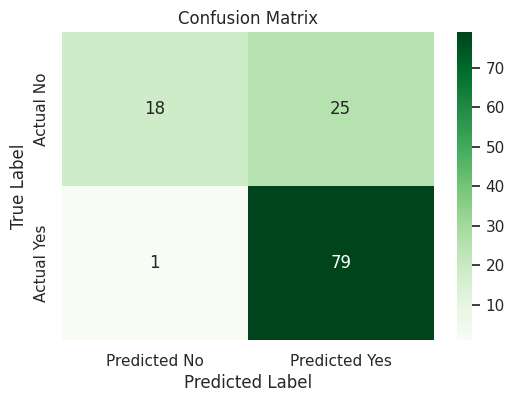

In [39]:
# Create a Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Visualize the Confusion Matrix using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=True,
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Parameters:
# A. cm --> Confusion Matrics which created
# B. annot=True --> Writing Numbers in boxes (18,79,1,25)
# C. fmt = Make the written numbers integers
# D. cmap = The color gradient
# E. cbar = The Color Gradient Bar right side the matric

# **3️⃣ Classification Report**

In [40]:
report = classification_report(y_test, y_pred, output_dict=True)

# output_dict = True --> Make as a dictionary

Classification Report Table:
----------------------------
              precision    recall  f1-score     support
0              0.947368  0.418605  0.580645   43.000000
1              0.759615  0.987500  0.858696   80.000000
accuracy       0.788618  0.788618  0.788618    0.788618
macro avg      0.853492  0.703052  0.719670  123.000000
weighted avg   0.825253  0.788618  0.761491  123.000000



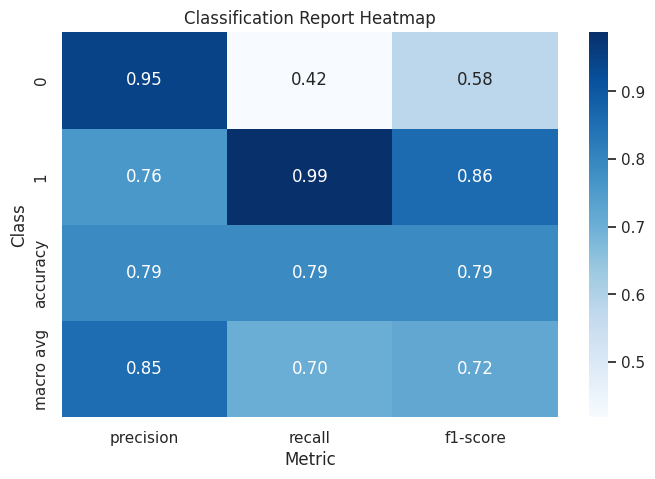

In [41]:
# Convert the report to DataFrame
report_df = pd.DataFrame(report).transpose()
print("Classification Report Table:")
print("----------------------------")
print(report_df)

print("\n ==========================================================")
# Visualize the Report using Heatmap
plt.figure(figsize = (8,5))
sns.heatmap(
    report_df.iloc[:-1, :3],  # Exclude 'accuracy' row, take precision/recall/f1
    annot=True,               # Show values inside cells
    cmap='Blues',             # Color map
    fmt='.2f'                 # Format numbers
)

plt.title('Classification Report Heatmap')
plt.ylabel('Class')
plt.xlabel('Metric')

plt.show()

# Hint: report_df.iloc[:-1, :3]
# iloc = Integer Location (Choosing by Number Not Name)
# :-1 --> Exclude last column (Support)
# :3 --> Include First 3 columns only (precision | recall | f1-score) and ignore last one (Support)
# Alternative Code Line --> report_df.loc[['0', '1'], ['precision', 'recall', 'f1-score']]
# This Alt line help to choose the columns by Names

# **`7. GENETIC ALGOTHIM`**

**We do this algorithm to choose the best offsets and ignore the rest of data offsets to prenvent the complexity and the overfiting.**

In [42]:
# Feature --> Gene
# Features Group --> Chromosome
# Feature == 1 --> Feature Used
# Feature == 0 --> Feature Ignored
# ex: [1,0,1,1,0] --> Features (1-3-4) in use and (2,5) are not

# Genetic Algorithms makes a Crossover and Mutation to find the best offset (Best Chromosome)
# Crossover == Mix a part of a parent's gene with another part from another parent to make anew "Mixed" Chromosme
# Mutation == Chaning "ONE" bit (GENE) in the offset to make it better

# **Because a problem in the Genetic Selection Library, we can use the alternative option (RFE).**

# **`8. Recursive Feature Elimination`**

In [43]:
# This Feature helps us also to find the best soluion but not the same way like GA
# Here we eliminate the weakest features until the remain ones are only the best features
# We use the Logistic Regression
# In each iteration we see which one has the least effect ans then we remove it

# RFE trains the model multiple times
# Removes weakest features recursively

In [44]:
# We alreary have created our regression model
# model = LogisticRegression(max_iter=1000)

rfe =RFE(
    estimator = model,
    n_features_to_select = 8
)

# Why 8 ?
# 8 is not a large number and also not a small number so we can make a balance

In [45]:
rfe.fit(X_train, y_train)
selected_feature = X_train.columns[rfe.support_]
print("Selected Features:")
for i, feature in enumerate(selected_feature, 1):
  print(f"{i}- {feature}")

# rfe.support_ --> Boolean mask

Selected Features:
1- CoapplicantIncome
2- LoanAmount
3- Credit_History
4- Married_Yes
5- Dependents_1
6- Dependents_2
7- Education_Not Graduate
8- Property_Area_Semiurban


In [46]:
# Setting up the data with the selected features

X_train_selected = X_train[selected_feature]
X_test_selected = X_test[selected_feature]

Accuracy: 0.7886178861788617


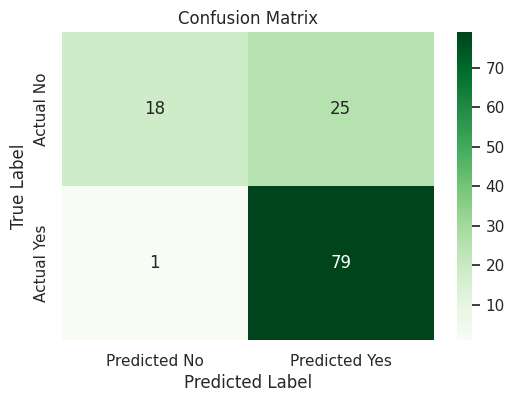

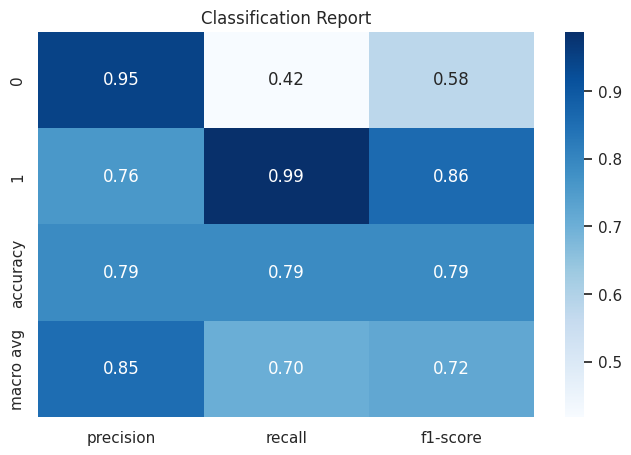

In [47]:
# Train the model using the selected features
model.fit(X_train_selected, y_train)

# Predict the target by usonf the selected features
y_pred = model.predict(X_test_selected)

# Evaluate the Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Generate Confusion Matrix as a dictionary
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True , fmt='d', cmap='Greens',
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Generate classification report as a dictionary
report_dict = classification_report(y_test, y_pred, output_dict=True)
# Convert the report to DataFrame for heatmap visualization
report_df = pd.DataFrame(report_dict).transpose()

plt.figure(figsize=(8, 5))
sns.heatmap(report_df.iloc[:-1, :3], annot=True, fmt='.2f', cmap='Blues', cbar=True)
plt.title('Classification Report')
plt.show()


# Precision --> How correct positive predictions are
# Recall --> How many actual positives we captured
# F1-score --> Balance between precision & recall

**We saw the same results because the original features were already informative, and Logistic Regression is a stable linear model that is not highly sensitive to redundant features.**

In [48]:
print("Before RFE:", X_train.shape[1])
print("After RFE:", X_train_selected.shape[1])


Before RFE: 14
After RFE: 8


In [49]:
print("Accuracy before RFE:", acc_before)
print("Accuracy after RFE:", accuracy)


Accuracy before RFE: 0.7886178861788617
Accuracy after RFE: 0.7886178861788617


**RFE successfully reduced the feature space without degrading model performance.**

# **`9. KNN`**

**This Algorithm classifies the new data by the similarity with the nearest neighbors**

In [50]:
# This Algorithm depends on distance
# Scaling is important in this algorithm

# Algorithm Map:
# a. Scaling
# b. Selcet K-neighbors
# c. Train the model and predict the target output
# d. Evaluate the mode
# e. visualization

Accuracy (KNN): 0.7804878048780488


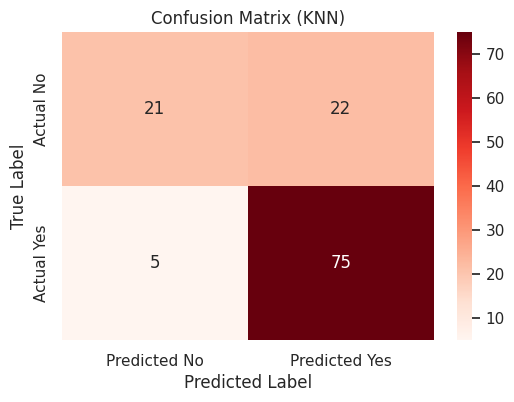

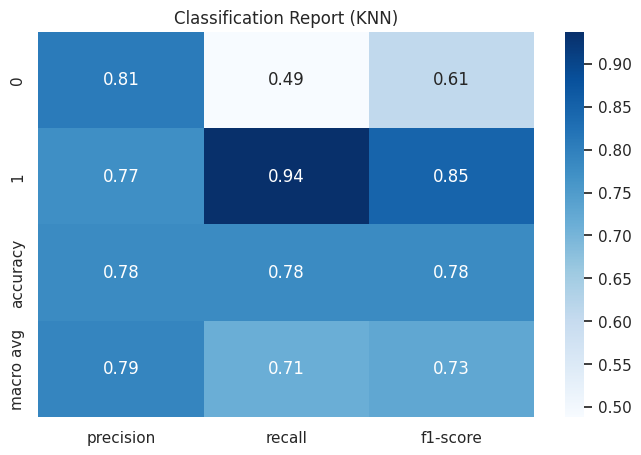

In [51]:
# A. Scaling
# Already done before but we will make it again on the train selected data
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

# B. Import KNN and Selctet Neighbors
knn = KNeighborsClassifier(n_neighbors=3)
# Train KNN using scaled features

# C. Train The Model and predict the output
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

# D. Evaluate the Model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy (KNN): {accuracy_knn}")

# E. Visualization
# 1. Confussion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Reds', cbar=True,
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (KNN)')


# 2. Classification Report
report_dict_knn = classification_report(y_test, y_pred_knn, output_dict=True)
report_df_knn = pd.DataFrame(report_dict_knn).transpose()

plt.figure(figsize=(8, 5))
sns.heatmap(report_df_knn.iloc[:-1,:3], annot=True, fmt='.2f', cmap='Blues', cbar=True)
plt.title('Classification Report (KNN)')
plt.show()

**The dataset benefits from a smaller neighborhood size, indicating that local patterns are more informative than global averaging.**

**Now, Lets try to find the best K**

Accuracy 1: 0.7560975609756098
Accuracy 2: 0.6666666666666666
Accuracy 3: 0.7723577235772358
Accuracy 4: 0.7723577235772358
Accuracy 5: 0.7886178861788617
Accuracy 6: 0.7723577235772358
Accuracy 7: 0.7886178861788617
Accuracy 8: 0.7642276422764228
Accuracy 9: 0.7804878048780488
Accuracy 10: 0.7479674796747967
Accuracy 11: 0.7642276422764228
Accuracy 12: 0.7642276422764228
Accuracy 13: 0.7804878048780488
Accuracy 14: 0.7723577235772358
Accuracy 15: 0.7886178861788617
Accuracy 16: 0.7967479674796748
Accuracy 17: 0.7804878048780488
Accuracy 18: 0.7886178861788617
Accuracy 19: 0.7886178861788617
Accuracy 20: 0.7967479674796748


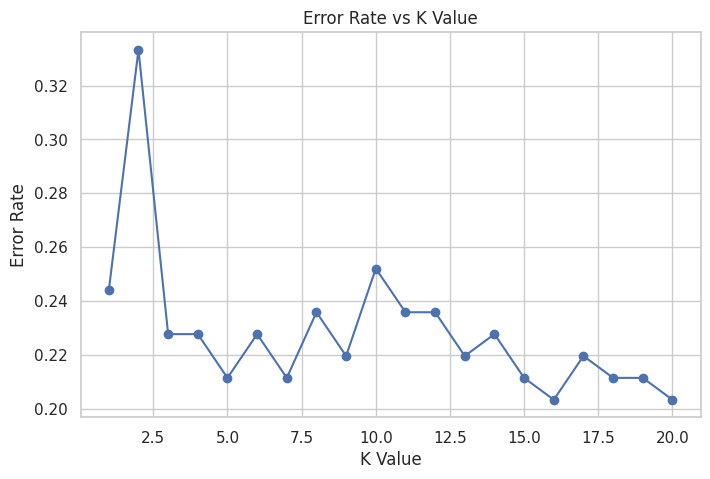

In [52]:
error_rate = []

for k in range(1,21):
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(X_train_selected, y_train)
  y_pred_k = knn.predict(X_test_selected)
  accuracy_knn = accuracy_score(y_test, y_pred_k)
  error_rate.append(1-accuracy_score(y_test, y_pred_k))
  print(f"Accuracy {k}: {accuracy_knn}")

# error_rate --> Classification error for each K

# Visualize the Results
plt.figure(figsize=(8,5))
plt.plot(range(1,21), error_rate, marker='o')
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.title('Error Rate vs K Value')
plt.show()

**KNN achieved its best performance with larger values of K, suggesting that the dataset benefits from smoother decision boundaries.**

**Train the model on KNN using Cross Validation Score**

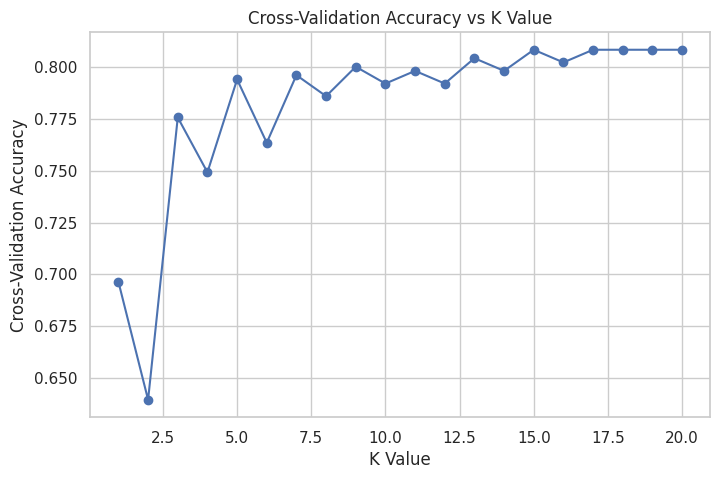

Best k: 15
Final Accuracy: 0.7886178861788617

Manhattan Accuracy: 0.7723577235772358
Weighted KNN Accuracy: 0.7804878048780488


In [53]:
k_range = range(1,21)
cv_scores = []

for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn, X_train_selected, y_train, cv=5, scoring='accuracy')
  cv_scores.append(scores.mean())

# Plot
plt.figure(figsize=(8,5))
plt.plot(k_range, cv_scores, marker='o')
plt.xlabel('K Value')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Cross-Validation Accuracy vs K Value')
plt.show()

best_k = k_range[cv_scores.index(max(cv_scores))]
print(f"Best k: {best_k}")

# Traib using the Best K we got
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train_selected, y_train)
y_pred_final = knn_best.predict(X_test_selected)

# Print the final Accuracy
print("Final Accuracy:", accuracy_score(y_test, y_pred_final))
print("\n===================================")

# Test the Data Classification using Manhattan
knn_manhattan = KNeighborsClassifier(
    n_neighbors=best_k,
    metric='manhattan'
)
knn_manhattan.fit(X_train_selected, y_train)
y_pred_manhattan = knn_manhattan.predict(X_test_selected)

print("Manhattan Accuracy:", accuracy_score(y_test, y_pred_manhattan))

# Test the Data Classification using Weights
knn_weighted = KNeighborsClassifier(
    n_neighbors=best_k,
    weights='distance'
)
knn_weighted.fit(X_train_selected, y_train)
y_pred_weighted = knn_weighted.predict(X_test_selected)

print("Weighted KNN Accuracy:", accuracy_score(y_test, y_pred_weighted))


# **Enhancing the KNN**

**Test the accuracy using GridSearchCV**

In [54]:
# That solution is more professional to determine the best parameters and NO. Of K-Neighbors
# The Algorithm of GridSearchCV helps us to find the best of each parameter to classify out data correct

# Parameters:
# A. The Metric we used ---> Eculidean or Manhattan
# B. Number of K-Neighbors ---> 15
# C. Weight we measure on ---> Uniform or Distance

# Then, based on these parameters we can calculate the score

param_grid = {
    'n_neighbors': range(1,21),
    'metric': ['euclidean', 'manhattan'],
    'weights': ['uniform','distance']
}

grid = GridSearchCV(
    knn,
    param_grid,
    cv=5,
    scoring='accuracy'
)

grid.fit(X_train_selected, y_train)

print(f"Best Parameters: {grid.best_params_}")
print(f"Best Score: {grid.best_score_}")

Best Parameters: {'metric': 'euclidean', 'n_neighbors': 15, 'weights': 'uniform'}
Best Score: 0.8085137085137084


# **`10. Decision Tree`**

In [55]:
# No need for Scaling data. So, we will use the pre-scaling data
# Works with non-linear data
# Explainable and good more than KNN and LR but more complex
# Helps in visualizing the most important features and the decision making
# Does not depend on Distance
# Does not be effected by the different data values

# Decision Tree Map:
# a. Import model
# b. Train model
# c. Predict output
# d. Evaluate the model (Accuracy)
# e. Visualization ---> Confusion Matrix - Classification Report
# f. Feature Importance

Accuracy (Decision Tree): 0.6991869918699187


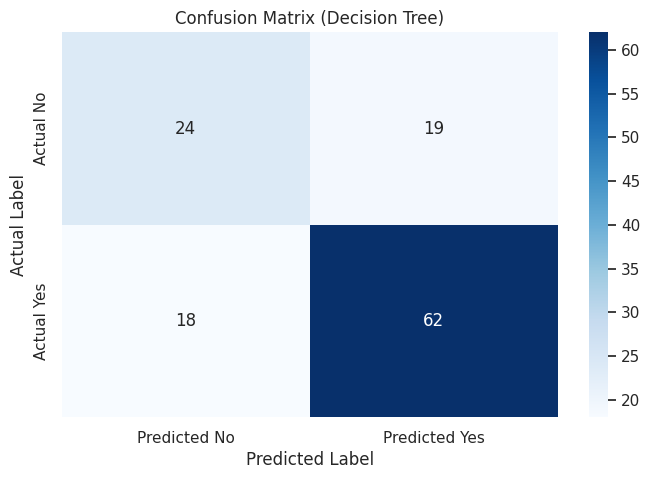

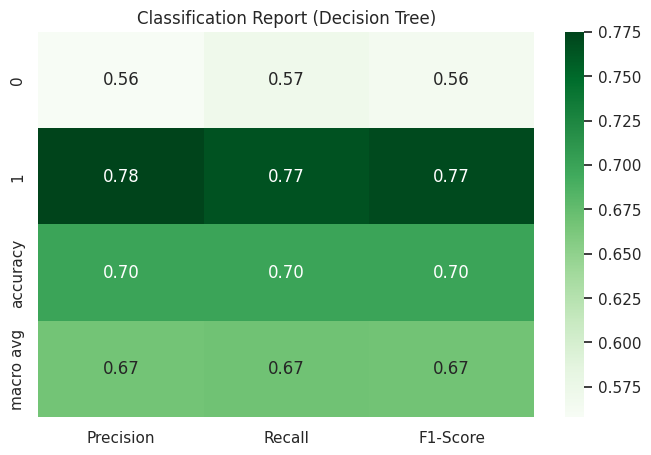

                   Feature  Importance
1               LoanAmount    0.364273
2           Credit_History    0.299751
0        CoapplicantIncome    0.170885
4             Dependents_1    0.050687
3              Married_Yes    0.037327
5             Dependents_2    0.036658
6   Education_Not Graduate    0.025441
7  Property_Area_Semiurban    0.014978


/tmp/ipython-input-1749662182.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


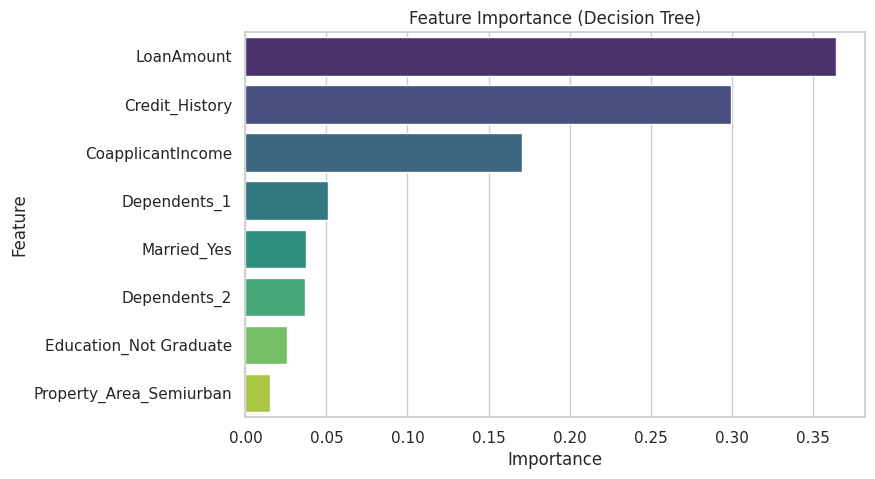

In [56]:
# A. Create Decision Tree Model
dt = DecisionTreeClassifier(
    random_state=42
)

# B. Train the model
dt.fit(X_train_selected , y_train)

# C. Predict the Output (Target Values)
y_pred_dt = dt.predict(X_test_selected)

# D. Evaluate the Model
accuracy_dt = accuracy_score(y_pred_dt, y_test)
print(f"Accuracy (Decision Tree): {accuracy_dt}")

# E. Visualization
# Confusion Matrix
plt.figure(figsize=(8,5))
sns.heatmap(
    confusion_matrix(y_test, y_pred_dt),
    annot=True,
    fmt='d',
    cmap='Blues',
    cbar=True,
    xticklabels=['Predicted No', 'Predicted Yes'],
    yticklabels=['Actual No', 'Actual Yes']
)

plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix (Decision Tree)')
plt.show

# Classification Report
report_dict_dt = classification_report(y_pred_dt , y_test , output_dict=True)
report_df_dt = pd.DataFrame(report_dict_dt).transpose()

plt.figure(figsize=(8,5))
sns.heatmap(
    report_df_dt.iloc[:-1, :3],
    annot=True,
    fmt='.2f',
    cmap='Greens',
    cbar=True,
    xticklabels=['Precision', 'Recall', 'F1-Score'],
    yticklabels=report_df_dt.index[:-1]
)

plt.title('Classification Report (Decision Tree)')
plt.show()

# F. Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X_train_selected.columns,
    'Importance': dt.feature_importances_
})

feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance)

# Visualize it
plt.figure(figsize=(8,5))
sns.barplot(
    x='Importance',
    y='Feature',
    data=feature_importance,
    palette='viridis'
)
plt.title('Feature Importance (Decision Tree)')
plt.show()


# **Enhancing The Decision Tree using GridSearchCV**

In [57]:
# Define the parameter Grid
param_grid = {
    'max_depth': [3,5,7,10,None],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,5]
}

# Apply the GridSearchCV
grid_dt = GridSearchCV(
    dt,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Train the GridSearchCV on TRAIN DATA only
grid_dt.fit(X_train_selected, y_train)

# Get the best model from GridSearchCV
print(f"Best Parameters: {grid_dt.best_params_}")
print(f"Best Score: {grid_dt.best_score_}")

Best Parameters: {'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Score: 0.8145743145743145


Decision Tree Accuracy after Tuning: 0.7886178861788617


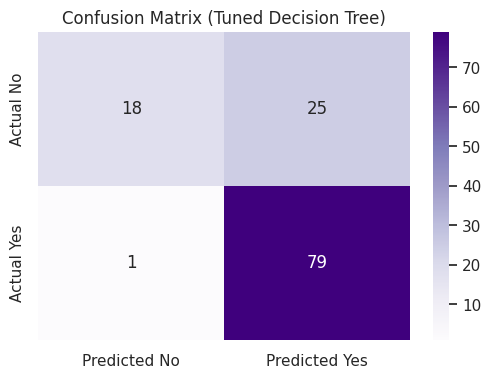

Classification Report               precision    recall  f1-score     support
0              0.947368  0.418605  0.580645   43.000000
1              0.759615  0.987500  0.858696   80.000000
accuracy       0.788618  0.788618  0.788618    0.788618
macro avg      0.853492  0.703052  0.719670  123.000000
weighted avg   0.825253  0.788618  0.761491  123.000000


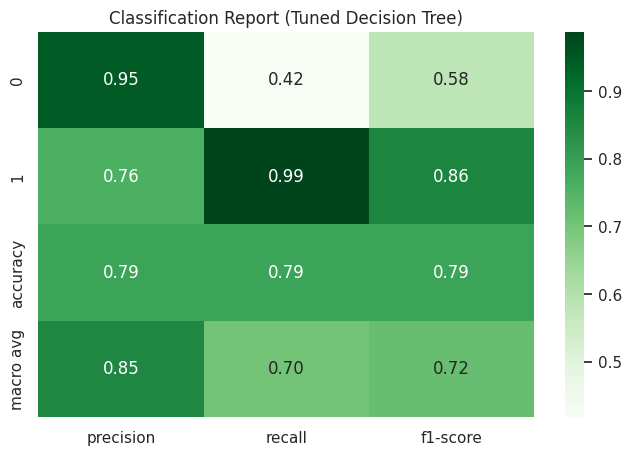

In [58]:
# Predict using the best Decision Tree
y_pred_dt_best = grid_dt.best_estimator_.predict(X_test_selected)

# Accuracy
acc_dt_best = accuracy_score(y_test, y_pred_dt_best)
print("Decision Tree Accuracy after Tuning:", acc_dt_best)

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_dt_best),
            annot=True, fmt='d', cmap='Purples',
            xticklabels=['Predicted No','Predicted Yes'],
            yticklabels=['Actual No','Actual Yes'])
plt.title('Confusion Matrix (Tuned Decision Tree)')
plt.show()

# Classification Report Heatmap
report_dt = classification_report(y_test, y_pred_dt_best, output_dict=True)
report_dt_df = pd.DataFrame(report_dt).transpose()
print(f"Classification Report {report_dt_df}")

plt.figure(figsize=(8,5))
sns.heatmap(report_dt_df.iloc[:-1,:3], annot=True, fmt='.2f', cmap='Greens')
plt.title('Classification Report (Tuned Decision Tree)')
plt.show()

In [59]:
# ===================== PROJECT SUMMARY =====================
# 1. Data Preparation:
#    - Loaded Loan Prediction dataset
#    - Handled missing values (mode for categorical, median for numerical)
#    - Performed EDA to understand distributions, imbalance, and outliers

# 2. Feature Engineering:
#    - Separated features (X) and target (y)
#    - Applied Label Encoding on target variable (Loan_Status)
#    - Applied One-Hot Encoding on categorical features
#    - Applied feature selection (RFE) to reduce dimensionality
#    - Scaling applied only for distance-based models (KNN)

# 3. Modeling:
#    - Logistic Regression used as baseline model
#    - KNN implemented with scaling and K tuning
#    - Decision Tree trained and then tuned using GridSearchCV
#      (max_depth, min_samples_split, min_samples_leaf)

# 4. Evaluation:
#    - Used Accuracy, Confusion Matrix, and Classification Report
#    - Final Decision Tree Confusion Matrix:
#      TN = 18, FP = 25, FN = 1, TP = 79
#    - Model shows strong ability to approve eligible loans (high recall for class 1)
#      but weaker performance in rejecting risky loans

# 5. Interpretation:
#    - Decision Tree provides feature importance for explainability
#    - Trade-off observed between accuracy and risk control

# 6. Current Status:
#    - Feature Engineering: COMPLETED
#    - Logistic Regression: COMPLETED
#    - KNN: COMPLETED
#    - Decision Tree (with tuning): COMPLETED
#    - Next Step: Random Forest + Final Model Comparison
# ==========================================================

# **11. Random Forest Classifier**

Random Forest Accuracy: 0.7642276422764228
Confusion Matrix:
 [[22 21]
 [ 8 72]]
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.51      0.60        43
           1       0.77      0.90      0.83        80

    accuracy                           0.76       123
   macro avg       0.75      0.71      0.72       123
weighted avg       0.76      0.76      0.75       123

Feature Importance:
                    Feature  Importance
1               LoanAmount    0.408239
2           Credit_History    0.272573
0        CoapplicantIncome    0.188917
7  Property_Area_Semiurban    0.035007
3              Married_Yes    0.031482
6   Education_Not Graduate    0.024283
4             Dependents_1    0.023437
5             Dependents_2    0.016061


/tmp/ipython-input-2887517416.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')


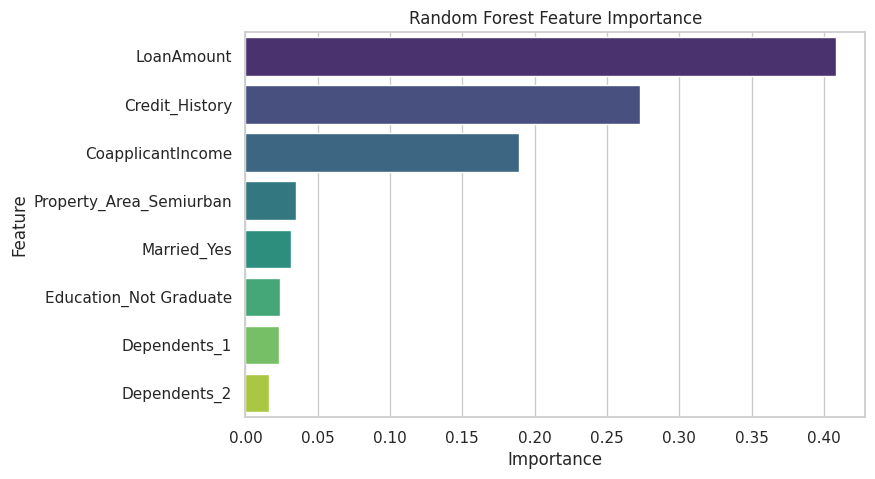

In [60]:
# Random Forest (RF) is an ensemble learning method based on Decision Trees.
# Main idea:
# 1. Instead of using a single Decision Tree, we use a "forest" of multiple trees.
# 2. Each tree is trained on a random subset of the training data (called Bootstrap Sampling).
# 3. During tree construction, each split considers a random subset of features to increase diversity.
# 4. For prediction, Random Forest takes a "majority vote" among all trees.
#    - For classification (like Loan_Status 0/1), each tree votes, and the class with the most votes is chosen.
# Advantages:
# - Reduces overfitting compared to a single Decision Tree.
# - Can handle high-dimensional data and complex relationships.
# - Provides Feature Importance to see which features are most influential.


# Step 1: Create the Random Forest model
# - random_state ensures reproducible results
rf = RandomForestClassifier(random_state=42)

# Step 2: Train the model
rf.fit(X_train_selected, y_train)

# Step 3: Predict using the trained model
y_pred_rf = rf.predict(X_test_selected)

# Step 4: Evaluate the model
# Accuracy = proportion of correct predictions
accuracy = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy)

# Confusion Matrix = shows True Positives, True Negatives, False Positives, False Negatives
cm = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:\n", cm)

# Classification Report = precision, recall, F1-score
report = classification_report(y_test, y_pred_rf)
print("Classification Report:\n", report)

# Step 5: Feature Importance
# Random Forest can measure how important each feature is in making predictions
feature_importance = pd.DataFrame({
    'Feature': X_train_selected.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature Importance:\n", feature_importance)

# Visualize Feature Importance
plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title('Random Forest Feature Importance')
plt.show()


# **Random Forest With GridSearchCV**

In [ ]:
# GridSearchCV helps us find the best combination of hyperparameters
# by trying all possible combinations and using cross-validation

# Step 1: Define the base Random Forest model
# We do NOT set parameters yet (GridSearch will handle that)
rf = RandomForestClassifier(
    random_state=42
)

# Step 2: Define the parameter grid
# These are the values GridSearchCV will try
param_grid_rf = {
    # Number of trees in the forest
    'n_estimators': [50, 100, 150],

    # Maximum depth of each tree
    # None means tree grows until all leaves are pure
    'max_depth': [3, 5, 7, None],

    # Minimum samples required to split an internal node
    'min_samples_split': [2, 5, 10],

    # Minimum samples required at a leaf node
    'min_samples_leaf': [1, 2, 4],

    # Number of features considered when looking for best split
    'max_features': ['sqrt', 'log2']
}

# Step 3: Create GridSearchCV object
# cv=5 → 5-Fold Cross Validation
# scoring='accuracy' → We want the best accuracy
# n_jobs=-1 → Use all CPU cores (faster)
grid_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Step 4: Train GridSearchCV on training data
# GridSearch will:
# - Train multiple Random Forest models
# - Try all parameter combinations
# - Evaluate each one using cross-validation
grid_rf.fit(X_train_selected, y_train)

# Step 5: Get the best parameters
print("Best Parameters found by GridSearchCV:")
print(grid_rf.best_params_)

# Step 6: Best cross-validation score
print("Best Cross-Validation Accuracy:")
print(grid_rf.best_score_)

# Step 7: Use the best model to predict test data
best_rf = grid_rf.best_estimator_
y_pred_rf_best = best_rf.predict(X_test_selected)

# Step 8: Final evaluation on test data
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Final Test Accuracy (Tuned Random Forest):",
      accuracy_score(y_test, y_pred_rf_best))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf_best))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf_best))


# **Final Models Comoparison**

In [ ]:
# List to store results
results = []

# ============================
# 1. K-Nearest Neighbors
# ============================
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_selected, y_train)
y_pred_knn = knn.predict(X_test_selected)

results.append({
    "Model": "KNN",
    "Accuracy": accuracy_score(y_test, y_pred_knn),
    "Precision": precision_score(y_test, y_pred_knn),
    "Recall": recall_score(y_test, y_pred_knn),
    "F1-Score": f1_score(y_test, y_pred_knn)
})

# ============================
# 2. Random Forest
# ============================
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_selected, y_train)
y_pred_rf = rf.predict(X_test_selected)

results.append({
    "Model": "Random Forest",
    "Accuracy": accuracy_score(y_test, y_pred_rf),
    "Precision": precision_score(y_test, y_pred_rf),
    "Recall": recall_score(y_test, y_pred_rf),
    "F1-Score": f1_score(y_test, y_pred_rf)
})

# ============================
# 3. XGBoost
# ============================
xgb = XGBClassifier(eval_metric='logloss', random_state=42)
xgb.fit(X_train_selected, y_train)
y_pred_xgb = xgb.predict(X_test_selected)

results.append({
    "Model": "XGBoost",
    "Accuracy": accuracy_score(y_test, y_pred_xgb),
    "Precision": precision_score(y_test, y_pred_xgb),
    "Recall": recall_score(y_test, y_pred_xgb),
    "F1-Score": f1_score(y_test, y_pred_xgb)
})

# ============================
# Results Table
# ============================
results_df = pd.DataFrame(results)
print(results_df)